## th_covid_2021 (Cleaned & Summary)

- Name: Tosawadh [REDACTED]
- Student ID: 614xxxxx26

In [263]:
import pandas as pd
import seaborn as sns
print(f'pandas version: {pd.__version__}')
print(f'seaborn version: {sns.__version__}')
# This code was ran in Python 3.9.7, Pandas 1.3.4 and Seaborn 0.11.2

pandas version: 1.3.4
seaborn version: 0.11.2


## 2021 monthly cases by country

In [264]:
dfs1=pd.read_html('https://en.wikipedia.org/wiki/COVID-19_pandemic_cases',header=0)
dfs1[4]
# Read table from Wikipedia page: COVID-19 pandemic cases


,Date,First case,Jan 1,Feb 1,Mar 1,Apr 1,May 1,Jun 1,Jul 1,Aug 1,Sep 1,Oct 1,Nov 1,Dec 1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,World,NaN,81963694.0,102593717.0,113793180.0,128575654.0,150989419.0,170448610.0,181967904.0,197882160.0,217734504.0,233678071.0,246693366.0,262275617.0
2,Days to double,NaN,74.0,80.0,95.0,113.0,126.0,139.0,164.0,185.0,NaN,NaN,NaN,NaN
3,Countries and territories,NaN,222.0,223.0,223.0,223.0,223.0,223.0,223.0,223.0,224.0,225.0,226.0,226.0
4,USA,"January 23, 2020",19346790.0,25817939.0,28244591.0,30095776.0,31948761.0,32938999.0,33333002.0,34766907.0,38936362.0,43092756.0,45665262.0,48162778.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Palau,"August 23, 2021",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,8.0,8.0
226,Vanuatu,"November 11, 2020",1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,5.0
227,Marshall Islands,"October 28, 2020",4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
228,Samoa,"January 20, 2021",0.0,2.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [265]:
df1=dfs1[4]

In [266]:
df1.drop(index=[0,2,3],columns='First case',inplace=True)
df1.rename(columns={"Date":"Country"},inplace=True)
# Dropped unused columns and renamed the "Date" column to "Country"

In [267]:
df1.columns=df1.columns.str.replace(r'\s\d','')
df1.rename(columns={
    "Jan":"January",
    "Feb":"February",
    "Mar":"March",
    "Apr":"April",
    "Jun":"June",
    "Jul":"July",
    "Aug":"August",
    "Sep":"September",
    "Oct":"October",
    "Nov":"November",
    "Dec":"December"},
inplace=True)
# Renamed all months column

C:\Users\tosaw\AppData\Local\Temp/ipykernel_21696/1001108411.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1.columns=df1.columns.str.replace(r'\s\d','')


In [268]:
df1=df1.astype({
    "January":'int',
    "February":'int',
    "March":'int',
    "April":'int',
    "May":'int',
    "June":'int',
    "July":'int',
    "August":'int',
    "September":'int',
    "October":'int',
    "November":'int',
    "December":'int'})
df1
# Set all values in all months column to integer

,Country,January,February,March,April,May,June,July,August,September,October,November,December
1,World,81963694,102593717,113793180,128575654,150989419,170448610,181967904,197882160,217734504,233678071,246693366,262275617
4,USA,19346790,25817939,28244591,30095776,31948761,32938999,33333002,34766907,38936362,43092756,45665262,48162778
5,India,10286709,10757610,11112241,12221665,19164969,28175044,30411634,31655824,32810845,33766707,34285814,34596776
6,Brazil,7619200,9176975,10517232,12658109,14590678,16515120,18513305,19880273,20752281,21399546,21804094,22084749
7,UK,2488784,3817180,4176558,4345792,4416627,4487343,4800911,5856532,6789585,7807040,9057633,10228776
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Palau,0,0,0,0,0,0,0,0,2,5,8,8
226,Vanuatu,1,1,1,3,3,3,3,3,3,3,5,5
227,Marshall Islands,4,4,4,4,4,4,4,4,4,4,4,4
228,Samoa,0,2,4,4,1,1,1,1,1,1,1,1


## Population count by country

In [269]:
dfs2=pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population',header=0)
dfs2[0]
# Read table from Wikipedia page: List of countries and dependencies by population

,Rank,Country / Dependency,Region,Population,% of world,Date,Source (official or from the United Nations),Notes
0,–,world,World,7931648000,NaN,21 Feb 2022,UN projection[1],NaN
1,1,China,Asia,1412600000,NaN,31 Dec 2021,National annual estimate[2],The population figure refers to mainland China...
2,2,India,Asia,1388315718,NaN,21 Feb 2022,National population clock[3],The figure includes the population of Jammu an...
3,3,United States,Americas,333265098,NaN,21 Feb 2022,National population clock[4],Includes the 50 states and the District of Col...
4,4,Indonesia[b],Asia,271350000,NaN,31 Dec 2020,National annual estimate[5],NaN
...,...,...,...,...,...,...,...,...
237,–,Niue (New Zealand),Oceania,1549,NaN,1 Jul 2021,National annual projection[92],NaN
238,–,Tokelau (New Zealand),Oceania,1501,NaN,1 Jul 2021,National annual projection[92],NaN
239,195,Vatican City,Europe,825,NaN,1 Feb 2019,Monthly national estimate[196],The total population of 825 consisted of 453 r...
240,–,Cocos (Keeling) Islands (Australia),Oceania,573,NaN,30 Jun 2020,National annual estimate[195],NaN


In [270]:
df2=dfs2[0]

In [271]:
df2.drop(columns=['Rank','Region','% of world','Date','Source (official or from the United Nations)','Notes'],inplace=True)
df2.rename(columns={"Country / Dependency":"Country"},inplace=True)
# Dropped unused columns and simplified the "Country / Dependency" column to "Country"

In [272]:
df2['Country']=df2['Country'].str.replace('[b]','',regex=False)
# Removed the attached reference link

In [273]:
df2.iloc[0,0]='World'
df2
# Capitalized the "w" in "world" on index row 0

,Country,Population
0,World,7931648000
1,China,1412600000
2,India,1388315718
3,United States,333265098
4,Indonesia,271350000
...,...,...
237,Niue (New Zealand),1549
238,Tokelau (New Zealand),1501
239,Vatican City,825
240,Cocos (Keeling) Islands (Australia),573


In [274]:
df2.iloc[3,0]='USA'
df2.iloc[6,0]='UK'
df2[:7]
# Renamed "United States" to "USA" on index row 3 and "United Kingdom" to "UK" on index row 6

,Country,Population
0,World,7931648000
1,China,1412600000
2,India,1388315718
3,USA,333265098
4,Indonesia,271350000
5,Pakistan,225200000
6,UK,214381683


## Analysis

In [275]:
df=pd.merge(df1,df2, on="Country")
df
# Merged both dataframes

,Country,January,February,March,April,May,June,July,August,September,October,November,December,Population
0,World,81963694,102593717,113793180,128575654,150989419,170448610,181967904,197882160,217734504,233678071,246693366,262275617,7931648000
1,USA,19346790,25817939,28244591,30095776,31948761,32938999,33333002,34766907,38936362,43092756,45665262,48162778,333265098
2,India,10286709,10757610,11112241,12221665,19164969,28175044,30411634,31655824,32810845,33766707,34285814,34596776,1388315718
3,UK,2488784,3817180,4176558,4345792,4416627,4487343,4800911,5856532,6789585,7807040,9057633,10228776,214381683
4,Russia,3186336,3868087,4257650,4554264,4814558,5081417,5538142,6288677,6937333,7535548,8554192,9669718,145478097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Palau,0,0,0,0,0,0,0,0,2,5,8,8,17957
180,Vanuatu,1,1,1,3,3,3,3,3,3,3,5,5,301295
181,Marshall Islands,4,4,4,4,4,4,4,4,4,4,4,4,54516
182,Samoa,0,2,4,4,1,1,1,1,1,1,1,1,199853


In [276]:
df.sort_values('December',ascending=False)
# Sort countries from most to least infections

,Country,January,February,March,April,May,June,July,August,September,October,November,December,Population
0,World,81963694,102593717,113793180,128575654,150989419,170448610,181967904,197882160,217734504,233678071,246693366,262275617,7931648000
1,USA,19346790,25817939,28244591,30095776,31948761,32938999,33333002,34766907,38936362,43092756,45665262,48162778,333265098
2,India,10286709,10757610,11112241,12221665,19164969,28175044,30411634,31655824,32810845,33766707,34285814,34596776,1388315718
3,UK,2488784,3817180,4176558,4345792,4416627,4487343,4800911,5856532,6789585,7807040,9057633,10228776,214381683
4,Russia,3186336,3868087,4257650,4554264,4814558,5081417,5538142,6288677,6937333,7535548,8554192,9669718,145478097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Palau,0,0,0,0,0,0,0,0,2,5,8,8,17957
180,Vanuatu,1,1,1,3,3,3,3,3,3,3,5,5,301295
181,Marshall Islands,4,4,4,4,4,4,4,4,4,4,4,4,54516
182,Samoa,0,2,4,4,1,1,1,1,1,1,1,1,199853


In [277]:
infper=df[['Country','Population']]
# Assign new dataframe for monthly infection rate

In [278]:
print('Table 1: Sort countries by infection rate (December)')
infper['%Jan']=df['January']/df['Population']*100
infper['%Feb']=df['February']/df['Population']*100
infper['%Mar']=df['March']/df['Population']*100
infper['%Apr']=df['April']/df['Population']*100
infper['%May']=df['May']/df['Population']*100
infper['%Jun']=df['June']/df['Population']*100
infper['%Jul']=df['July']/df['Population']*100
infper['%Aug']=df['August']/df['Population']*100
infper['%Sep']=df['September']/df['Population']*100
infper['%Oct']=df['October']/df['Population']*100
infper['%Nov']=df['November']/df['Population']*100
infper['%Dec']=df['December']/df['Population']*100
infper=infper[['Country','%Jan','%Feb','%Mar','%Apr','%May','%Jun','%Jul','%Aug','%Oct','%Nov','%Dec','Population']]
infper.sort_values('%Dec',ascending=False)

Table 1: Sort countries by infection rate (December)


C:\Users\tosaw\AppData\Local\Temp/ipykernel_21696/3257692598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infper['%Jan']=df['January']/df['Population']*100
C:\Users\tosaw\AppData\Local\Temp/ipykernel_21696/3257692598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infper['%Feb']=df['February']/df['Population']*100
C:\Users\tosaw\AppData\Local\Temp/ipykernel_21696/3257692598.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,Country,%Jan,%Feb,%Mar,%Apr,%May,%Jun,%Jul,%Aug,%Oct,%Nov,%Dec,Population
100,Montenegro,7.829153,9.994753,12.373130,14.792228,15.673919,16.042819,16.140678,16.430068,21.168474,23.233801,25.331318,621306
112,Maldives,3.590640,4.134574,5.166064,6.284730,7.787072,16.807653,19.296332,20.240124,22.150417,22.946220,23.947173,383135
139,Seychelles,0.269148,1.210661,2.639060,4.222697,5.647064,11.705409,15.877704,18.509707,21.708232,22.470313,23.670894,99202
45,Georgia,6.125936,6.928951,7.265997,7.570188,8.353249,9.258126,9.844463,11.323045,16.487890,19.347563,22.799661,3728573
148,Andorra,10.120073,12.493871,13.661910,15.100270,16.636701,17.259068,17.490413,18.454768,19.138744,19.508393,21.606840,79535
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Marshall Islands,0.007337,0.007337,0.007337,0.007337,0.007337,0.007337,0.007337,0.007337,0.007337,0.007337,0.007337,54516
178,Solomon Islands,0.002335,0.002335,0.002472,0.002610,0.002747,0.002747,0.002747,0.002747,0.002747,0.002747,0.002747,728041
180,Vanuatu,0.000332,0.000332,0.000332,0.000996,0.000996,0.000996,0.000996,0.000996,0.000996,0.001660,0.001660,301295
183,Tonga,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001005,0.001005,99532


In [279]:
print('Table 2: Showing countries that has higher infection rate than global infection (December 2021)')
infper.loc[infper['%Dec']>=infper.iloc[0,11]]

Table 2: Showing countries that has higher infection rate than global infection (December 2021)


,Country,%Jan,%Feb,%Mar,%Apr,%May,%Jun,%Jul,%Aug,%Oct,%Nov,%Dec,Population
0,World,1.033375,1.293473,1.434673,1.621046,1.903632,2.148968,2.294200,2.494843,2.946148,3.110241,3.306698,7931648000
1,USA,5.805225,7.746968,8.475112,9.030581,9.586591,9.883723,10.001948,10.432208,12.930474,13.702384,14.451792,333265098
3,UK,1.160913,1.780553,1.948188,2.027128,2.060170,2.093156,2.239422,2.731825,3.641654,4.225003,4.771292,214381683
4,Russia,2.190251,2.658879,2.926660,3.130550,3.309473,3.492909,3.806856,4.322766,5.179851,5.880055,6.646855,145478097
5,Turkey,1.646563,2.925667,3.190339,3.917302,5.692697,6.199087,6.407221,6.763140,8.448331,9.486257,10.386821,84680273
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Saint Vincent and the Grenadines,0.107502,0.813941,1.405652,1.579100,1.701959,1.838368,2.010009,2.074149,3.169040,4.472610,4.991147,110696
170,Liechtenstein,5.672907,6.556665,6.773773,7.052183,7.718832,7.925723,8.002350,8.147940,9.087890,9.425047,12.439018,39151
172,Antigua and Barbuda,0.160061,0.221468,0.730846,1.143582,1.240223,1.268410,1.271430,1.311697,3.252565,4.085084,4.168638,99337
173,Monaco,2.281617,3.882660,5.092568,5.966102,6.398957,6.529335,6.719687,7.533246,8.638853,8.904824,9.820078,38350


In [280]:
print('Table 3: Describing monthly infection rate (Excluded "Population" column and "World" row)')
infper[['Country','%Jan','%Feb','%Mar','%Apr','%May','%Jun','%Jul','%Aug','%Oct','%Nov','%Dec']].loc[1:].describe()

Table 3: Describing monthly infection rate (Excluded "Population" column and "World" row)


,%Jan,%Feb,%Mar,%Apr,%May,%Jun,%Jul,%Aug,%Oct,%Nov,%Dec
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,1.606028,1.998479,2.297040,2.704124,3.077300,3.409923,3.640001,3.931904,4.775609,5.207921,5.758129
std,2.017399,2.470739,2.818823,3.307483,3.673659,4.046519,4.248749,4.413246,4.927276,5.288946,5.892524
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000500,0.000500
25%,0.094745,0.119882,0.139623,0.169633,0.181281,0.211182,0.249104,0.326458,0.438133,0.482695,0.484875
50%,0.654201,0.883403,1.077824,1.328801,1.399836,1.728482,1.896968,2.280160,3.274829,3.960836,4.638927
75%,2.732378,3.401003,3.971877,4.836170,5.669880,6.177625,6.438340,6.646972,7.830281,8.601717,8.903948
max,10.120073,12.493871,13.661910,15.100270,16.636701,17.259068,19.296332,20.240124,22.150417,23.233801,25.331318


In [281]:
diff=df[['Country']]
# Assign new dataframe for monthly infections

In [282]:
print('Table 4: Monthly infections (2021)')
diff['Jan-Feb']=df['February']-df['January']
diff['Feb-Mar']=df['March']-df['February']
diff['Mar-Apr']=df['April']-df['March']
diff['Apr-May']=df['May']-df['April']
diff['May-Jun']=df['June']-df['May']
diff['Jun-Jul']=df['July']-df['June']
diff['Jul-Aug']=df['August']-df['July']
diff['Aug-Sep']=df['September']-df['August']
diff['Sep-Oct']=df['October']-df['September']
diff['Oct-Nov']=df['November']-df['October']
diff['Nov-Dec']=df['December']-df['November']
diff

Table 4: Monthly infections (2021)


C:\Users\tosaw\AppData\Local\Temp/ipykernel_21696/2137387001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff['Jan-Feb']=df['February']-df['January']
C:\Users\tosaw\AppData\Local\Temp/ipykernel_21696/2137387001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff['Feb-Mar']=df['March']-df['February']
C:\Users\tosaw\AppData\Local\Temp/ipykernel_21696/2137387001.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,Country,Jan-Feb,Feb-Mar,Mar-Apr,Apr-May,May-Jun,Jun-Jul,Jul-Aug,Aug-Sep,Sep-Oct,Oct-Nov,Nov-Dec
0,World,20630023,11199463,14782474,22413765,19459191,11519294,15914256,19852344,15943567,13015295,15582251
1,USA,6471149,2426652,1851185,1852985,990238,394003,1433905,4169455,4156394,2572506,2497516
2,India,470901,354631,1109424,6943304,9010075,2236590,1244190,1155021,955862,519107,310962
3,UK,1328396,359378,169234,70835,70716,313568,1055621,933053,1017455,1250593,1171143
4,Russia,681751,389563,296614,260294,266859,456725,750535,648656,598215,1018644,1115526
...,...,...,...,...,...,...,...,...,...,...,...,...
179,Palau,0,0,0,0,0,0,0,2,3,3,0
180,Vanuatu,0,0,2,0,0,0,0,0,0,2,0
181,Marshall Islands,0,0,0,0,0,0,0,0,0,0,0
182,Samoa,2,2,0,-3,0,0,0,0,0,0,0


In [283]:
print('Table 5: Comparing Thailand infection rate to global infection rate')
infper.loc[df['Country'].isin(['World','Thailand'])]

Table 5: Comparing Thailand infection rate to global infection rate


,Country,%Jan,%Feb,%Mar,%Apr,%May,%Jun,%Jul,%Aug,%Oct,%Nov,%Dec,Population
0,World,1.033375,1.293473,1.434673,1.621046,1.903632,2.148968,2.29420,2.494843,2.946148,3.110241,3.306698,7931648000
23,Thailand,0.010312,0.029388,0.038994,0.043237,0.100431,0.242708,0.39672,0.921736,2.419602,2.876430,3.176881,66755980


In [284]:
print('Table 6: Comparing Thailand infection rate to all ASEAN countries')
infper.loc[df['Country'].isin(['Thailand','Singapore','Malaysia','Myanmar','Laos','Vietnam','Cambodia','Brunei','Indonesia','Philippines'])].sort_values('%Dec',ascending=False)

Table 6: Comparing Thailand infection rate to all ASEAN countries


,Country,%Jan,%Feb,%Mar,%Apr,%May,%Jun,%Jul,%Aug,%Oct,%Nov,%Dec,Population
20,Malaysia,0.345609,0.657391,0.919765,1.056614,1.249933,1.750391,2.299714,3.404626,6.867821,7.558816,8.051617,32698800
84,Singapore,1.074501,1.091683,1.099017,1.107177,1.121186,1.137799,1.147481,1.191525,1.769858,3.637487,4.854133,5453600
150,Brunei,0.035349,0.041861,0.043256,0.049302,0.052326,0.056512,0.060465,0.078372,1.654888,3.053495,3.510008,429999
23,Thailand,0.010312,0.029388,0.038994,0.043237,0.100431,0.242708,0.396720,0.921736,2.419602,2.876430,3.176881,66755980
18,Philippines,0.425081,0.471309,0.516800,0.670056,0.930265,1.103170,1.266591,1.424776,2.286451,2.499265,2.539866,111523113
13,Indonesia,0.273889,0.397389,0.491850,0.557108,0.614840,0.671348,0.811906,1.267881,1.553981,1.564312,1.568707,271350000
34,Vietnam,0.001487,0.001847,0.002485,0.002642,0.002972,0.007544,0.017310,0.152330,0.802715,0.935054,1.256808,98510000
116,Laos,0.000559,0.000600,0.000613,0.000668,0.010316,0.026057,0.028905,0.085843,0.324976,0.548817,1.004908,7337783
61,Myanmar,0.225391,0.253450,0.256616,0.257589,0.258282,0.259751,0.288176,0.547364,0.842612,0.905959,0.945520,55294979
108,Cambodia,0.002431,0.002996,0.005273,0.015927,0.086174,0.197464,0.323973,0.496669,0.724341,0.762091,0.772456,15552211


In [285]:
print("Table 7: Thailand's monthly infection")
diff.loc[df['Country'].isin(['Thailand'])]

Table 7: Thailand's monthly infection


,Country,Jan-Feb,Feb-Mar,Mar-Apr,Apr-May,May-Jun,Jun-Jul,Jul-Aug,Aug-Sep,Sep-Oct,Oct-Nov,Nov-Dec
23,Thailand,12734,6413,2832,38181,94978,102812,350480,604217,395698,304960,200569


Chart 1: Monthly infection boxblot


<AxesSubplot:>

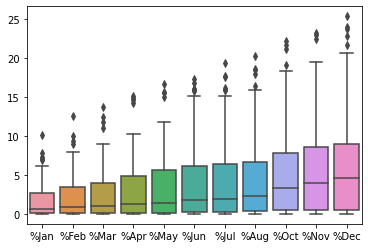

In [286]:
print('Chart 1: Monthly infection boxblot')
sns.boxplot(data=infper[['%Jan','%Feb','%Mar','%Apr','%May','%Jun','%Jul','%Aug','%Oct','%Nov','%Dec']].loc[1:])

Chart 2: ASEAN infection rate heatmap
White=Less infections, Red=More infections


<AxesSubplot:>

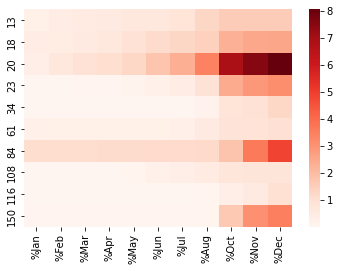

In [287]:
print('Chart 2: ASEAN infection rate heatmap')
print('White=Less infections, Red=More infections')
sns.heatmap(infper[
        ['%Jan',
        '%Feb',
        '%Mar',
        '%Apr',
        '%May',
        '%Jun',
        '%Jul',
        '%Aug',
        '%Oct',
        '%Nov',
        '%Dec']].
    loc[infper['Country'].
    isin(
        ['Thailand',
        'Singapore',
        'Malaysia',
        'Myanmar',
        'Laos',
        'Vietnam',
        'Cambodia',
        'Brunei',
        'Indonesia',
        'Philippines'])],
    cmap="Reds")

## Summary
### ประเทศไทย เป็นประเทศเสี่ยงสูงหรือไม่เมื่อเทียบกับประเทศอื่นๆ?
จากตารางที่ 5 จะสังเกตได้ว่า ค่าเฉลี่ยของเปอร์เซ็นต์ผู้ติดเชื้อของประเทศไทยนั้นเพิ่มขึ้นจนเกือบใกล้เคียงกับเปอร์เว็นต์ผู้ติดเชื้อเฉลี่ยของประชากรทั่วโลกแล้ว ซึ่งถ้าในอุดมการณ์ของผมแล้ว ผมถือว่าตอนนี้ ประเทศไทยนั้นถือว่าเป็นประเทศเสี่ยงสูงในระดับหนึ่งแล้ว หากรัฐบาลไม่เร่งแก้ไขโดยเร็ว อาจจะทำให้เปอร์เว็นต์ยอดผู้ติดเชื้อของไทยนั้นสูงกว่าของประชากรทั่วโลกก็ได้

### ประเทศไทย มีแนวโน้มที่จะมีผู้ป่วยกลับมาเพิ่มขึ้นหรือไม่?
จากตารางที่ 7 จะสังเกตได้ว่า จำนวนผู้ติดเชื้อรายเดือนนั้นเริ่มลดลงอย่างรวดเร็วในช่วงเดือนกันยายน อาจเนื่องไปด้วยมาตรการป้องกันที่ดีในช่วงนั้น ซึ่งอาจเป็นสัญญาณที่ดีที่จะทำให้ผู้ป่วยลดลงอย่างต่อเนื่อง แต่ทว่า ในช่วง 3 วันที่ผ่านมา ประเทศญี่ปุ่นได้พบว่า ไวรัส COVID-19 สายพันธุ์โอไมครอนนั้น มีความรุนแรงเท่ากับสายพันธุ์เดลต้า ซึ่งก่อนหน้านี้ได้มีการวินิจฉัยมาแล้วว่า COVID-19 สายพันธุ์โอไมครอนนั้น สามารถแพร่กระจายได้อย่างรวดเร็ว ซึ่งอาจส่งผลให้ประเทศไทยกลับมามีผู้ป่วยเป็นจำนวนมาก

### ถ้าอยากเดินทางไปต่างประเทศในแถบ ASEAN ประเทศไหนที่น่าไปในช่วงนี้?
หากเทียบจากประเทศไทยแล้ว จะเห็นได้ว่า เปอร์เซ็นต์ผู้ติดเชื้อในประเทศไทยในเดือนธันวาคมนั้น เป็นอันดับ 4 ของ ASEAN(ข้อมูลจากตารางที่ 6 และแผนภูมิที่ 2) ซึ่งหากต้องการเดินทางก็ควรจะหลีกเลี่ยงประเทศที่มีอัตราผู้ติดเชื้อสูงกว่าประเทศไทยทั้ง 3 ประเทศ ได้แก่ มาเลเซีย สิงคโปร์ และ บรูไน เพื่อลดความเสี่ยงที่จะติดเชื้อ COVID-19

### จำนวนผู้ป่วยทั้งหมดบนโลกนั้น มีแนวโน้มที่จะลดลงหรือไม่?
จากแผนภูมิที่ 1 จะสังเกตได้ว่า เปอร์เซ็นต์ผู้ติดเชื้อทั้งหมดได้เริ่มชะลอตัวในเดือนตุลาคม-พฤศจิกายน ซึ่งเป็นสัญญาณที่ดีที่แปลว่า การแพร่ระบาดของไวรัส COVID-19 นั้นกำลังชะลอตัวลง ซึ่งในอีกไม่ช้า เราอาจจะเริ่มเห็นจำนวนผู้ติดเชื้อน้อยลง แต่ก็อย่างที่กล่าวมาในหัวข้อที่ 2 ซึ่งก็คือ COVID-19 สายพันธุ์โอไมครอนนั้น สามารถแพร่กระจายได้อย่างรวดเร็ว และมีความรุนแรงเท่ากับสายพันธุ์เดลต้า ซึ่งที่กล่าวมานี้ ทำให้ผมตั้งสมมุติฐานว่า ในอนาคต ไวรัส COVID-19 ก็อาจจะมีการกลายพันธุ์ได้อีก และส่งผลทำให้ผู้ติดเชื้อสูงขึ้นเช่นกัน

## References
- COVID-19 pandemic cases: https://en.wikipedia.org/wiki/COVID-19_pandemic_cases
- List of countries and dependencies by population: https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population
- ผงะ นักวิจัยญี่ปุ่น พบ 'โอมิครอนล่องหน' BA.2 ร้ายกว่าตัวแม่: https://www.thairath.co.th/news/foreign/2319666
- โควิดสายพันธุ์ โอไมครอน คืออะไร น่ากลัวแค่ไหน: https://vichaivej-nongkhaem.com/health-info/%E0%B9%82%E0%B8%84%E0%B8%A7%E0%B8%B4%E0%B8%94%E0%B9%82%E0%B8%AD%E0%B9%84%E0%B8%A1%E0%B8%84%E0%B8%A3%E0%B8%AD%E0%B8%99/